In [437]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 8  # that's default image size for this
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
pd.options.display.max_columns = 100

In [438]:
df=pd.read_csv("parsed_df/parsed_df.csv")

In [439]:
df.head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,PERIOD_x,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,PLAYER2_ID,PLAYER3_ID,SCOREMARGIN,WCTIMESTRING,HOME_TEAM_ID,AWAY_TEAM_ID,HOME_PLAYER1_ID,HOME_PLAYER2_ID,HOME_PLAYER3_ID,HOME_PLAYER4_ID,HOME_PLAYER5_ID,AWAY_PLAYER1_ID,AWAY_PLAYER2_ID,AWAY_PLAYER3_ID,AWAY_PLAYER4_ID,AWAY_PLAYER5_ID,ACTION_BEFORE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,DRIBBLES,FINAL_MARGIN,LOCATION,PTS,PTS_TYPE,SHOT_CLOCK,SHOT_DIST,SHOT_NUMBER,SHOT_RESULT,TOUCH_TIME,W,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,ACTION_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,off_height,def_height,SEC_LEFT_Q,SEC_LEFT_G
0,0,1,2,2,21300001,1,4,0,0,0,0,0,7:12 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,10,101131,1.6,2,10,1,0,2,6.7,7.4,1,missed,7.8,True,2,2561,1610612754,Jump Shot,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,-38,45,0,81,79,699,2859
1,1,79,1,5,21300001,1,4,0,0,0,0,2,7:13 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,6,203090,4.1,1,10,1,2,2,16.8,19.3,1,made,3.2,True,5,202331,1610612754,Pullup Jump shot,Mid-Range,Right Side Center(RC),16-24 ft.,19,105,164,1,81,81,690,2850
2,2,1,2,6,21300001,1,5,0,0,0,0,-2,7:13 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,1,202331,4.4,0,-10,0,0,3,13.0,24.5,1,missed,0.7,False,6,201167,1610612753,Jump Shot,Above the Break 3,Center(C),24+ ft.,27,51,266,0,77,81,675,2835
3,3,5,2,8,21300001,1,4,0,5,0,101131,2,7:13 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,4,101131,0.4,0,10,1,0,2,13.8,1.4,2,missed,1.8,True,8,2561,1610612754,Layup Shot,Restricted Area,Center(C),Less Than 8 ft.,2,28,-5,0,81,79,663,2823
4,4,1,1,11,21300001,1,4,4,0,2561,0,5,7:14 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,5,2749,5.7,0,10,1,3,3,15.6,25.1,1,made,0.7,True,11,202362,1610612754,Jump Shot,Above the Break 3,Center(C),24+ ft.,26,15,260,1,77,72,651,2811


In [510]:
dftouse=df.copy()
dftouse=dftouse.dropna()
dftouse=dftouse.sample(20000, replace=False)
del dftouse['Unnamed: 0']
del dftouse['EVENTMSGACTIONTYPE']
del dftouse['WCTIMESTRING']
del dftouse['SHOT_RESULT']
del dftouse['ACTION_TYPE']
del dftouse['SHOT_ZONE_BASIC']
del dftouse['SHOT_ZONE_AREA']
del dftouse['SHOT_ZONE_RANGE']
del dftouse['PERSON1TYPE']
del dftouse['TEAM_ID']
del dftouse['GAME_ID']
del dftouse['HOME_TEAM_ID']
del dftouse['AWAY_TEAM_ID']
del dftouse['HOME_PLAYER1_ID']
del dftouse['HOME_PLAYER2_ID']
del dftouse['HOME_PLAYER3_ID']
del dftouse['HOME_PLAYER4_ID']
del dftouse['HOME_PLAYER5_ID']
del dftouse['AWAY_PLAYER1_ID']
del dftouse['AWAY_PLAYER2_ID']
del dftouse['AWAY_PLAYER3_ID']
del dftouse['AWAY_PLAYER4_ID']
del dftouse['AWAY_PLAYER5_ID']
del dftouse['PTS']
del dftouse['W']
del dftouse['PERSON3TYPE']
del dftouse['CLOSEST_DEFENDER_PLAYER_ID']
del dftouse['PLAYER3_ID']
del dftouse['PLAYER2_ID']
del dftouse['EVENTMSGTYPE']
del dftouse['FINAL_MARGIN']
del dftouse['PERIOD_x']
dftouse.head()

,EVENTNUM,PERSON2TYPE,SCOREMARGIN,ACTION_BEFORE,CLOSE_DEF_DIST,DRIBBLES,LOCATION,PTS_TYPE,SHOT_CLOCK,SHOT_DIST,SHOT_NUMBER,TOUCH_TIME,GAME_EVENT_ID,PLAYER_ID,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,off_height,def_height,SEC_LEFT_Q,SEC_LEFT_G
237139,511,0,-20,4,3.1,2,1,3,16.3,26.7,4,3.4,511,203910,25,133,214,1,75,76,88,88
230060,55,0,9,1,5.8,0,1,3,9.7,23.4,2,0.9,55,1890,22,226,42,0,79,79,409,2569
84095,114,0,2,1,1.2,3,1,2,8.3,8.9,4,6.7,114,1717,7,-51,60,1,84,83,128,2288
301093,107,0,-3,1,4.9,4,0,3,1.0,26.0,1,3.2,107,101150,27,-153,225,0,73,83,2,2162
384052,210,0,8,1,4.0,0,1,2,13.7,0.7,2,0.7,210,203949,0,0,1,0,81,73,303,1743


In [511]:
#drop all rows with NaN values
dftouse = dftouse.dropna()
dftouse.shape

(20000, 22)

In [512]:
cols = list(dftouse)
cols.insert(0, cols.pop(cols.index('SHOT_MADE_FLAG')))
dftouse = dftouse.ix[:, cols]
dftouse.head()

,SHOT_MADE_FLAG,EVENTNUM,PERSON2TYPE,SCOREMARGIN,ACTION_BEFORE,CLOSE_DEF_DIST,DRIBBLES,LOCATION,PTS_TYPE,SHOT_CLOCK,SHOT_DIST,SHOT_NUMBER,TOUCH_TIME,GAME_EVENT_ID,PLAYER_ID,SHOT_DISTANCE,LOC_X,LOC_Y,off_height,def_height,SEC_LEFT_Q,SEC_LEFT_G
237139,1,511,0,-20,4,3.1,2,1,3,16.3,26.7,4,3.4,511,203910,25,133,214,75,76,88,88
230060,0,55,0,9,1,5.8,0,1,3,9.7,23.4,2,0.9,55,1890,22,226,42,79,79,409,2569
84095,1,114,0,2,1,1.2,3,1,2,8.3,8.9,4,6.7,114,1717,7,-51,60,84,83,128,2288
301093,0,107,0,-3,1,4.9,4,0,3,1.0,26.0,1,3.2,107,101150,27,-153,225,73,83,2,2162
384052,0,210,0,8,1,4.0,0,1,2,13.7,0.7,2,0.7,210,203949,0,0,1,81,73,303,1743


In [513]:
dftouse.shape

(20000, 22)

In [514]:
#dftouse.isnull().sum()

In [515]:
#dftouse.isnull().any()

In [516]:
Xnames = list(dftouse.columns.values[1:22])

In [517]:
Xnames

['EVENTNUM',
 'PERSON2TYPE',
 'SCOREMARGIN',
 'ACTION_BEFORE',
 'CLOSE_DEF_DIST',
 'DRIBBLES',
 'LOCATION',
 'PTS_TYPE',
 'SHOT_CLOCK',
 'SHOT_DIST',
 'SHOT_NUMBER',
 'TOUCH_TIME',
 'GAME_EVENT_ID',
 'PLAYER_ID',
 'SHOT_DISTANCE',
 'LOC_X',
 'LOC_Y',
 'off_height',
 'def_height',
 'SEC_LEFT_Q',
 'SEC_LEFT_G']

In [518]:
#create train and test set
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [519]:
import sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [530]:
%%time
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20), "max_depth": [50,100,200,400]}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, dftouse, Xnames, 'SHOT_MADE_FLAG', 1, mask=mask, n_jobs = 4, score_func='accuracy')

using mask


/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 18, 'max_depth': 50} 0.827214285714 [mean: 0.77679, std: 0.00728, params: {'n_estimators': 1, 'max_depth': 50}, mean: 0.79400, std: 0.00354, params: {'n_estimators': 2, 'max_depth': 50}, mean: 0.79179, std: 0.00464, params: {'n_estimators': 3, 'max_depth': 50}, mean: 0.81179, std: 0.00321, params: {'n_estimators': 4, 'max_depth': 50}, mean: 0.80000, std: 0.00376, params: {'n_estimators': 5, 'max_depth': 50}, mean: 0.81657, std: 0.00761, params: {'n_estimators': 6, 'max_depth': 50}, mean: 0.81586, std: 0.00533, params: {'n_estimators': 7, 'max_depth': 50}, mean: 0.81536, std: 0.00695, params: {'n_estimators': 8, 'max_depth': 50}, mean: 0.81507, std: 0.00438, params: {'n_estimators': 9, 'max_depth': 50}, mean: 0.82029, std: 0.00434, params: {'n_estimators': 10, 'max_depth': 50}, mean: 0.81650, std: 0.00426, params: {'n_estimators': 11, 'max_depth': 50}, mean: 0.81971, std: 0.00585, params: {'n_estimators': 12, 'max_depth': 50}, mean: 0.82000, std: 0.00858, params: {

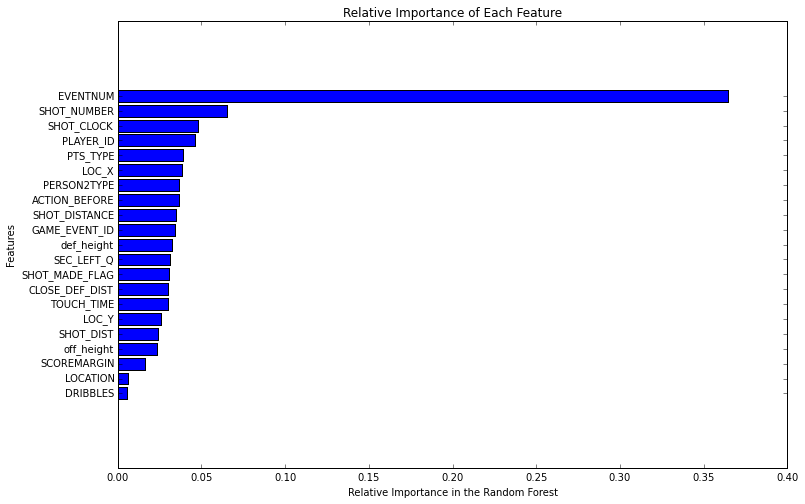

In [521]:
importance_list = clfForest.feature_importances_
name_list = dftouse.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative Importance of Each Feature')
plt.show()

In [522]:
importance_list

(0.0056259409835258383,
 0.0060081242638765023,
 0.016323161382137054,
 0.023299223092532999,
 0.023829668356766923,
 0.025805151799909023,
 0.03005199830847987,
 0.030123398141671951,
 0.030503349519078824,
 0.031497545428174838,
 0.03249833357209074,
 0.034408843805472406,
 0.035058204110821056,
 0.036701263276447148,
 0.03686247265874304,
 0.038358836593214665,
 0.039268290803409996,
 0.046273218475857095,
 0.047965623688482006,
 0.065031955755133153,
 0.36450539598417486)

(0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.2562852854854288e-05,
 5.7725066270953088e-05,
 0.00010520139517282297,
 0.0001171758625448588,
 0.00012985092820240213,
 0.00014550103472767853,
 0.00015720060213897063,
 0.00016344773636598202,
 0.00018919761458105095,
 0.00020179760957223392,
 0.00020431563389204836,
 0.0002132235228531615,
 0.00022241109205790819,
 0.00022331964333562886,
 0.00023323161387600781,
 0.00023552204234460845,
 0.00024477051407776463,
 0.00024795836018796463,
 0.00028235962376978451,
 0.00028888234067114002,
 0.00032082298058926144,
 0.00035039790271542234,
 0.00036150941702149577,
 0.00036254940566047872,
 0.00041502055247696928,
 0.0009726686573821396,
 0.0012635514100828432,
 0.0016028112579140801,
 0.0023003995411606478,
 0.0026213048650718714,
 0.002753197266597365,
 0.0040132782963560485,
 0.0043757740076294854,
 0.0077412607562209008,
 0.016716171687298321,
 0.028183756520184167,
 0.094017845429364644,
 0.23718287304352134,
 0.59074915191325461)

In [256]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse , shooter, u'SHOT_MADE_FLAG', 1, mask=mask)

using mask
BEST PARAMS {'C': 0.001}
############# based on standard predict ################
Accuracy on training data: 0.54
Accuracy on test data:     0.55
########################################################
CPU times: user 8.59 s, sys: 21.8 ms, total: 8.61 s
Wall time: 8.61 s


/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [257]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if mesh:
        if zfunc:
            p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
            p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z=zfunc(p0, p1)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=alpha, axes=ax)
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    ax.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

IndexError: index 1 is out of bounds for axis 1 with size 1

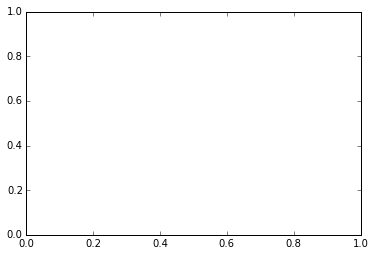

In [260]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, clfsvm);

In [261]:
type(clfsvm)

sklearn.svm.classes.LinearSVC

In [ ]:
#dftouse=dftouse.fillna(0)